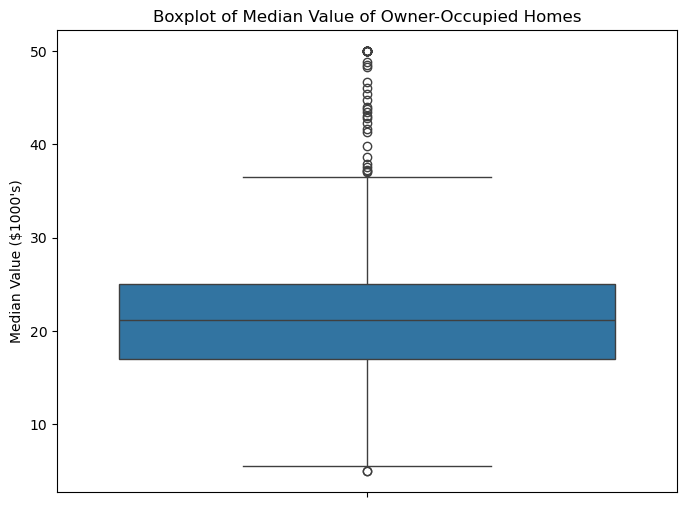

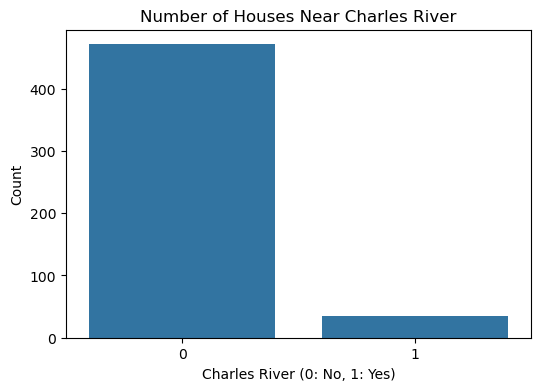

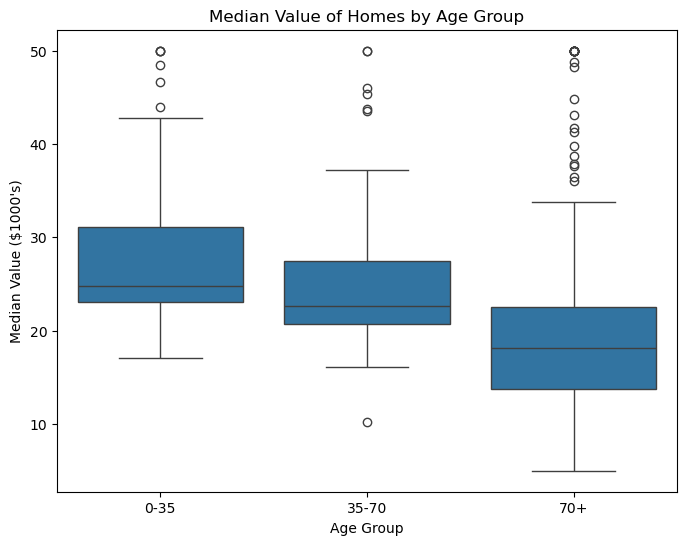

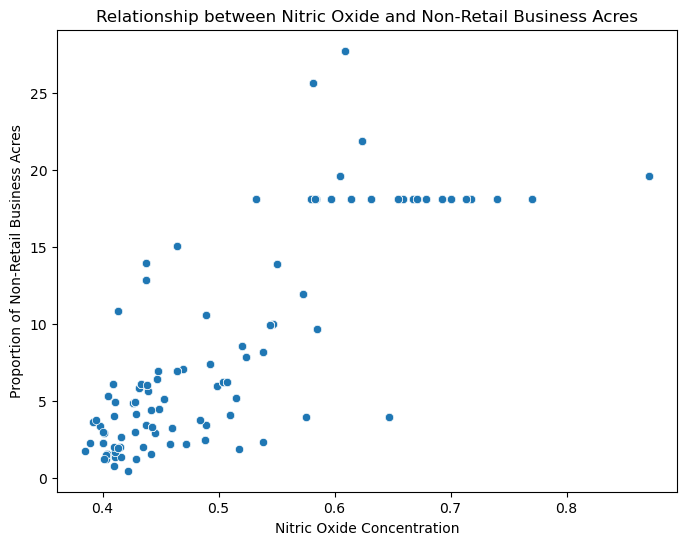

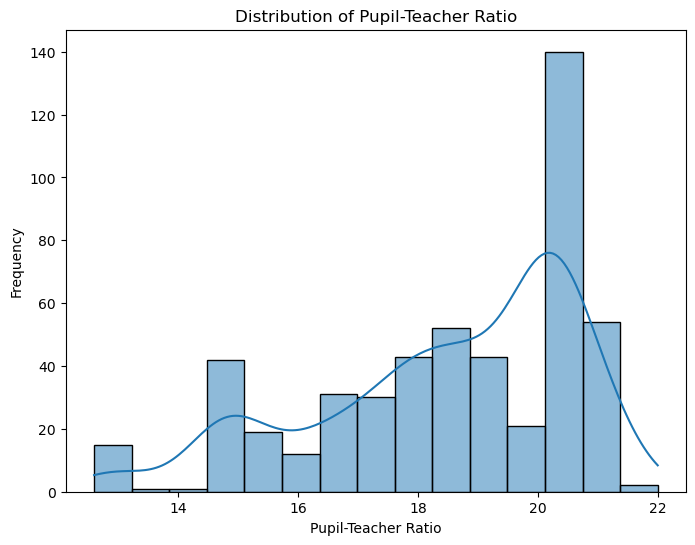

T-test for Charles River impact on house prices:
T-statistic: 3.9964, P-value: 0.0001
There is a significant difference in median values of houses near the Charles River.

ANOVA for Age Groups and Median Home Value:
F-statistic: 36.4076, P-value: 0.0000
There is a significant difference in median home values across age groups.

Pearson Correlation for NOX and INDUS:
Correlation Coefficient: 0.7637, P-value: 0.0000
There is a significant correlation between NOX and INDUS.

Regression Analysis for Distance to Employment Centers Impact on Home Value:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        12:48:18   Log-Likelih

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.formula.api as smf

# Load the dataset from statsmodels
boston = sm.datasets.get_rdataset("Boston", "MASS").data

# Convert to DataFrame
df = pd.DataFrame(boston)

# Boxplot for Median Value of Owner-Occupied Homes
plt.figure(figsize=(8,6))
sns.boxplot(y=df['medv'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000's)")
plt.show()

# Bar Plot for Charles River Variable
plt.figure(figsize=(6,4))
sns.countplot(x=df['chas'])
plt.title("Number of Houses Near Charles River")
plt.xlabel("Charles River (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

# Boxplot for MEDV vs AGE Groups
df['age_group'] = pd.cut(df['age'], bins=[0,35,70,100], labels=["0-35", "35-70", "70+"])
plt.figure(figsize=(8,6))
sns.boxplot(x=df['age_group'], y=df['medv'])
plt.title("Median Value of Homes by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Value ($1000's)")
plt.show()

# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['nox'], y=df['indus'])
plt.title("Relationship between Nitric Oxide and Non-Retail Business Acres")
plt.xlabel("Nitric Oxide Concentration")
plt.ylabel("Proportion of Non-Retail Business Acres")
plt.show()

# Histogram for Pupil-Teacher Ratio
plt.figure(figsize=(8,6))
sns.histplot(df['ptratio'], bins=15, kde=True)
plt.title("Distribution of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

# Hypothesis Testing
# T-test for Houses Near Charles River
t_stat, p_value = ttest_ind(df[df['chas'] == 1]['medv'], df[df['chas'] == 0]['medv'])
print("T-test for Charles River impact on house prices:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in median values of houses near the Charles River.")
else:
    print("No significant difference in median values of houses near the Charles River.")

# ANOVA for Age Groups and Median Value
anova_result = f_oneway(df[df['age_group'] == "0-35"]['medv'],
                        df[df['age_group'] == "35-70"]['medv'],
                        df[df['age_group'] == "70+"]['medv'])
print("\nANOVA for Age Groups and Median Home Value:")
print(f"F-statistic: {anova_result.statistic:.4f}, P-value: {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("There is a significant difference in median home values across age groups.")
else:
    print("No significant difference in median home values across age groups.")

# Pearson Correlation for NOX and INDUS
corr_coef, corr_p = pearsonr(df['nox'], df['indus'])
print("\nPearson Correlation for NOX and INDUS:")
print(f"Correlation Coefficient: {corr_coef:.4f}, P-value: {corr_p:.4f}")
if corr_p < 0.05:
    print("There is a significant correlation between NOX and INDUS.")
else:
    print("No significant correlation between NOX and INDUS.")

# Regression Analysis for DIS impact on MEDV
model = smf.ols("medv ~ dis", data=df).fit()
print("\nRegression Analysis for Distance to Employment Centers Impact on Home Value:")
print(model.summary())
